In [13]:
# Mengimpor library yang diperlukan
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
!pip install gradio

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import gradio as gr
import numpy as np
from PIL import Image
import os
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [15]:
# Cek ketersediaan GPU
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: []


In [16]:
# Definisi direktori dataset
train_dir = '/content/drive/MyDrive/vehicle_datasett/train'
validation_dir = '/content/drive/MyDrive/vehicle_datasett/validation'
test_dir = '/content/drive/MyDrive/vehicle_datasett/test'

# Inisialisasi ImageDataGenerator untuk normalisasi
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Generator untuk data pelatihan
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

# Generator untuk data validasi
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 200 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [17]:
# Fungsi untuk menghitung jumlah gambar
def count_images(directory):
    count = 0
    for root, dirs, files in os.walk(directory):
        count += len([file for file in files if file.endswith('.jpg') or file.endswith('.png')])
    return count

# Hitung jumlah gambar di setiap set
num_train_images = count_images(train_dir)
num_validation_images = count_images(validation_dir)
num_test_images = count_images(test_dir)

print(f"Jumlah gambar di train set: {num_train_images}")
print(f"Jumlah gambar di validation set: {num_validation_images}")
print(f"Jumlah gambar di test set: {num_test_images}")

# Menghitung steps_per_epoch dan validation_steps
batch_size = 32
steps_per_epoch = num_train_images // batch_size
validation_steps = num_validation_images // batch_size

Jumlah gambar di train set: 187
Jumlah gambar di validation set: 188
Jumlah gambar di test set: 187


In [18]:
# Membangun model CNN
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Melatih model
history = model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

# Cetak riwayat pelatihan
print(history.history)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5495 - loss: 2.2850

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 5s/step - accuracy: 0.5474 - loss: 2.3300 - val_accuracy: 0.4875 - val_loss: 0.6920
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2/5 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.4062 - loss: 0.7324

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.4250 - loss: 0.7292 - val_accuracy: 0.4750 - val_loss: 0.7181
Epoch 3/10
4/5 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5391 - loss: 0.6887

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.5412 - loss: 0.6883

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 59s 5s/step - accuracy: 0.5427 - loss: 0.6881 - val_accuracy: 0.4938 - val_loss: 0.6850
Epoch 4/10
2/5 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.6250 - loss: 0.6699   

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5500 - loss: 0.6887 - val_accuracy: 0.5437 - val_loss: 0.6726
Epoch 5/10
4/5 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5944 - loss: 0.6450

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 41s 9s/step - accuracy: 0.5879 - loss: 0.6498 - val_accuracy: 0.4812 - val_loss: 0.6889
Epoch 6/10
1/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6250 - loss: 0.6303

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


2/5 ━━━━━━━━━━━━━━━━━━━━ 2s 848ms/step - accuracy: 0.6375 - loss: 0.6342

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6450 - loss: 0.6366 - val_accuracy: 0.4875 - val_loss: 0.6921
Epoch 7/10
4/5 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5648 - loss: 0.6811

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 49s 5s/step - accuracy: 0.5604 - loss: 0.6813 - val_accuracy: 0.5250 - val_loss: 0.6561
Epoch 8/10
2/5 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.5547 - loss: 0.6781

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.5875 - loss: 0.6684 - val_accuracy: 0.7250 - val_loss: 0.6502
Epoch 9/10


/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6561 - loss: 0.6602

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 40s 8s/step - accuracy: 0.6595 - loss: 0.6588 - val_accuracy: 0.8313 - val_loss: 0.6258
Epoch 10/10
2/5 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.6562 - loss: 0.6458

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


5/5 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.6562 - loss: 0.6412 - val_accuracy: 0.8000 - val_loss: 0.6088
{'accuracy': [0.5367646813392639, 0.4375, 0.550000011920929, 0.5, 0.574999988079071, 0.6499999761581421, 0.5514705777168274, 0.609375, 0.6764705777168274, 0.65625], 'loss': [2.554845094680786, 0.7269933819770813, 0.68692946434021, 0.701280951499939, 0.659443736076355, 0.6381255984306335, 0.6819005012512207, 0.6620304584503174, 0.6520085334777832, 0.638027548789978], 'val_accuracy': [0.48750001192092896, 0.4749999940395355, 0.4937500059604645, 0.543749988079071, 0.48124998807907104, 0.48750001192092896, 0.5249999761581421, 0.7250000238418579, 0.831250011920929, 0.800000011920929], 'val_loss': [0.6919676065444946, 0.7181275486946106, 0.6850382089614868, 0.6725741624832153, 0.6888646483421326, 0.6921054720878601, 0.6561459898948669, 0.650154709815979, 0.6258159279823303, 0.6087547540664673]}


In [20]:
# Compile Model
model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Fungsi untuk menampilkan Confusion Matrix
def plot_confusion_matrix(model, test_dir, target_size=(150, 150), batch_size=32):
    test_datagen = ImageDataGenerator(rescale=1./255)
    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='binary',
        shuffle=False
    )

    # Prediksi pada data uji
    predictions = model.predict(test_generator)
    predicted_classes = (predictions > 0.5).astype(int).flatten()
    true_classes = test_generator.classes

    # Hitung confusion matrix
    cm = confusion_matrix(true_classes, predicted_classes)

    # Tampilkan confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Bus', 'Truck'])
    disp.plot(cmap=plt.cm.Blues)
    plt.title('Confusion Matrix: Prediksi vs Aktual')
    plt.show()

Found 200 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


4/7 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step   

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step


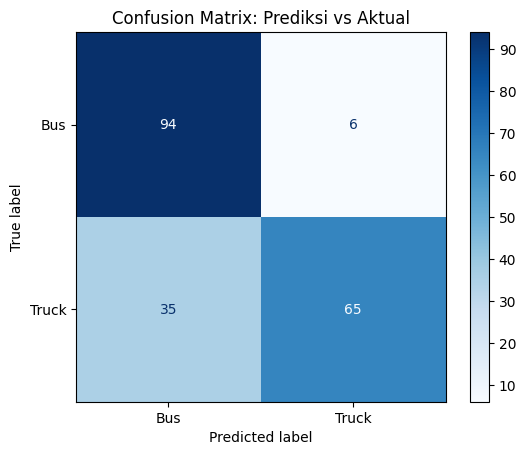

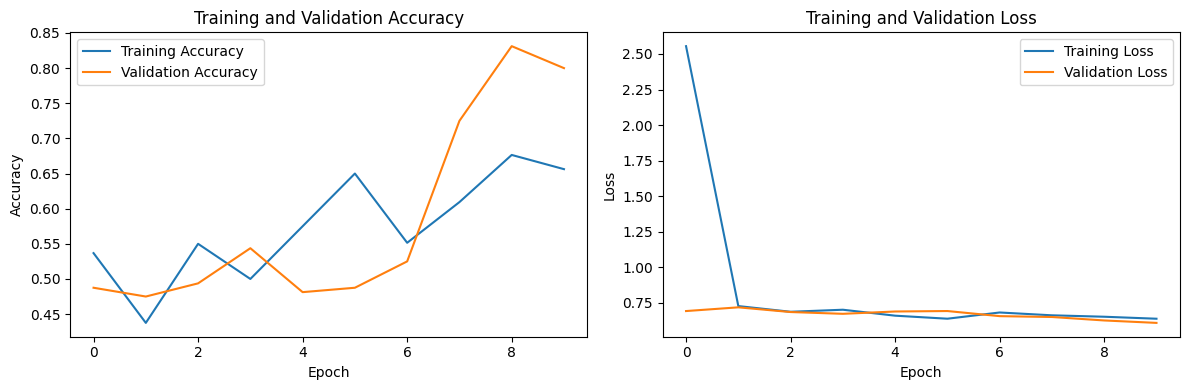

In [23]:
# Fungsi untuk menampilkan Learning Curve
def plot_learning_curve(history):
    # Plot akurasi
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Panggil fungsi visualisasi
plot_confusion_matrix(model, test_dir)
plot_learning_curve(history)

In [24]:
def classify_image(img):
    img = img.resize((150, 150))
    img = np.array(img) / 255.0
    img = np.expand_dims(img, axis=0)
    prediction = model.predict(img)
    return 'Bus' if prediction < 0.5 else 'Truck'

interface = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type='pil'),
    outputs="text",
    title="Vehicle Classifier",
    description="Upload a vehicle image (bus or truck) to classify it using a CNN.",
    allow_flagging="never"  # Nonaktifkan tombol flag
)

interface.launch()

/usr/local/lib/python3.11/dist-packages/gradio/interface.py:416: UserWarning: The `allow_flagging` parameter in `Interface` is deprecated.Use `flagging_mode` instead.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d188fd987031eb9e64.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
